In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
df = pd.read_csv('./data/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explorative

In [3]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
df[['Survived']][df['Age'].isna()].value_counts()

Survived
0           125
1            52
dtype: int64

## Get Feature columns

In [5]:
df = df[['Sex', 'Pclass', 'Fare', 'Survived', 'Age']].dropna() #needs to be a dataframe


## Column Transform

In [6]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [7]:
X.columns

Index(['Sex', 'Pclass', 'Fare', 'Age'], dtype='object')

In [8]:
numerical_features = ['Fare', 'Age']
categorical_features = ['Sex', 'Pclass']

In [9]:
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
])

In [10]:
# column transformation
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
])

## Train the model

In [11]:
pipeline = Pipeline(
    [('col_transformer', transformer), # step-1 column transformation
     ('LogReg', LogisticRegression())  # step-2 linear fit
    ]).fit(X,y)

In [12]:
pipeline_night = Pipeline(
    [('col_transformer', transformer), # step-1 column transformation
     ('neight', KNeighborsClassifier())  # step-2 linear fit
    ]).fit(X,y)

## Get Training Score

In [13]:
pipeline.score(X,y)

0.7983193277310925

In [14]:
pipeline_night.score(X,y)

0.8613445378151261

## Analysing Prediction

In [72]:
df['Survived_lg'] = pipeline.predict(df)
df.head()

,Sex,Pclass,Fare,Survived,Age,Survived_lg,Survived_night
0,male,3,7.2500,0,22.0,0,0
1,female,1,71.2833,1,38.0,1,1
2,female,3,7.9250,1,26.0,0,0
3,female,1,53.1000,1,35.0,1,1
4,male,3,8.0500,0,35.0,0,0


## KNN Analysing Prediction

In [71]:
df['Survived_night'] = pipeline_night.predict(df)
df.head()

,Sex,Pclass,Fare,Survived,Age,Survived_lg,Survived_night
0,male,3,7.2500,0,22.0,0,0
1,female,1,71.2833,1,38.0,1,1
2,female,3,7.9250,1,26.0,0,0
3,female,1,53.1000,1,35.0,1,1
4,male,3,8.0500,0,35.0,0,0


In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['Survived'], df['Survived_night'])

array([[401,  23],
       [114, 176]], dtype=int64)

In [73]:
df['Comparision_night'] = np.where(df['Survived']== df['Survived_night'], True, False)

In [74]:
df_vis_train = df[df['Comparision_night']== False]
df_vis_train.head(5)

,Sex,Pclass,Fare,Survived,Age,Survived_lg,Survived_night,Comparision_night
2,female,3,7.9250,1,26.0,0,0,False
8,female,3,11.1333,1,27.0,0,0,False
10,female,3,16.7000,1,4.0,1,0,False
14,female,3,7.8542,0,14.0,1,1,False
21,male,2,13.0000,1,34.0,0,0,False


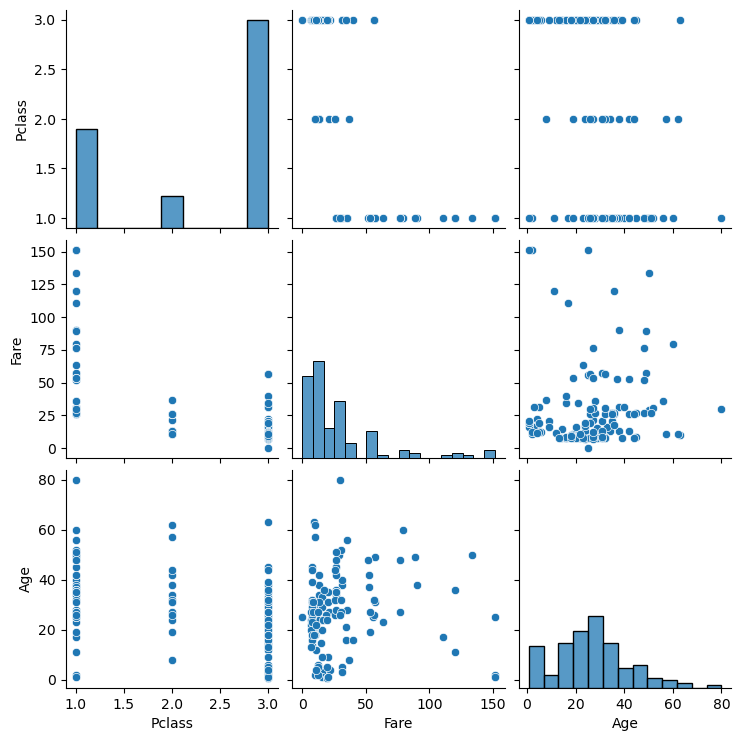

In [75]:
sns.pairplot(df_vis_train[['Sex', 'Pclass', 'Fare', 'Age']])

## Test Model

In [15]:
df_test = pd.read_csv('./data/test.csv')

## Get Feature Columns

In [31]:
df_test = df_test[['Sex', 'Pclass', 'Fare', 'Age']].dropna()

## Result

In [32]:
df_test['Survived'] = pipeline.predict(df_test)
df_test

,Sex,Pclass,Fare,Age,Survived
0,male,3,7.8292,34.5,0
1,female,3,7.0000,47.0,0
2,male,2,9.6875,62.0,0
3,male,3,8.6625,27.0,0
4,female,3,12.2875,22.0,1
...,...,...,...,...,...
409,female,3,13.7750,3.0,1
411,female,1,90.0000,37.0,1
412,female,3,7.7750,28.0,1
414,female,1,108.9000,39.0,1


In [69]:
df_test['Survived_night'] =pipeline_night.predict(df_test)
df_test.head()

,Sex,Pclass,Fare,Age,Survived,Survived_night,Comparision,Comparision_2
0,male,3,7.8292,34.5,0,0,False,True
1,female,3,7.0000,47.0,0,0,False,True
2,male,2,9.6875,62.0,0,0,False,True
3,male,3,8.6625,27.0,0,0,False,False
4,female,3,12.2875,22.0,1,1,False,True


In [70]:
df_test['Comparision'] = df_test['Survived'].equals(df_test['Survived_night'])
df_test.head()

,Sex,Pclass,Fare,Age,Survived,Survived_night,Comparision,Comparision_2
0,male,3,7.8292,34.5,0,0,False,True
1,female,3,7.0000,47.0,0,0,False,True
2,male,2,9.6875,62.0,0,0,False,True
3,male,3,8.6625,27.0,0,0,False,False
4,female,3,12.2875,22.0,1,1,False,True


In [39]:
df_test['Comparision_2'] = np.where(df_test['Survived']== df_test['Survived_night'], True, False)
df_test

,Sex,Pclass,Fare,Age,Survived,Survived_night,Comparision,Comparision_2
0,male,3,7.8292,34.5,0,0,False,True
1,female,3,7.0000,47.0,0,0,False,True
2,male,2,9.6875,62.0,0,0,False,True
3,male,3,8.6625,27.0,0,1,False,False
4,female,3,12.2875,22.0,1,1,False,True
...,...,...,...,...,...,...,...,...
409,female,3,13.7750,3.0,1,1,False,True
411,female,1,90.0000,37.0,1,1,False,True
412,female,3,7.7750,28.0,1,0,False,False
414,female,1,108.9000,39.0,1,1,False,True


In [40]:
df_test['Comparision'].value_counts(), df_test['Comparision_2'].value_counts()

(False    331
 Name: Comparision, dtype: int64,
 True     282
 False     49
 Name: Comparision_2, dtype: int64)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             331 non-null    object 
 1   Pclass          331 non-null    int64  
 2   Fare            331 non-null    float64
 3   Age             331 non-null    float64
 4   Survived        331 non-null    int64  
 5   Survived_night  331 non-null    int64  
 6   Comparision     331 non-null    bool   
 7   Comparision_2   331 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(1)
memory usage: 18.7+ KB


In [59]:
df_vis = df_test[df_test['Comparision_2']== False]
df_vis.head(5)


,Sex,Pclass,Fare,Age,Survived,Survived_night,Comparision,Comparision_2
3,male,3,8.6625,27.0,0,1,False,False
6,female,3,7.6292,30.0,1,0,False,False
21,male,3,3.1708,9.0,0,1,False,False
23,male,1,61.3792,21.0,1,0,False,False
28,male,1,30.5000,41.0,0,1,False,False


In [60]:
import seaborn as sns

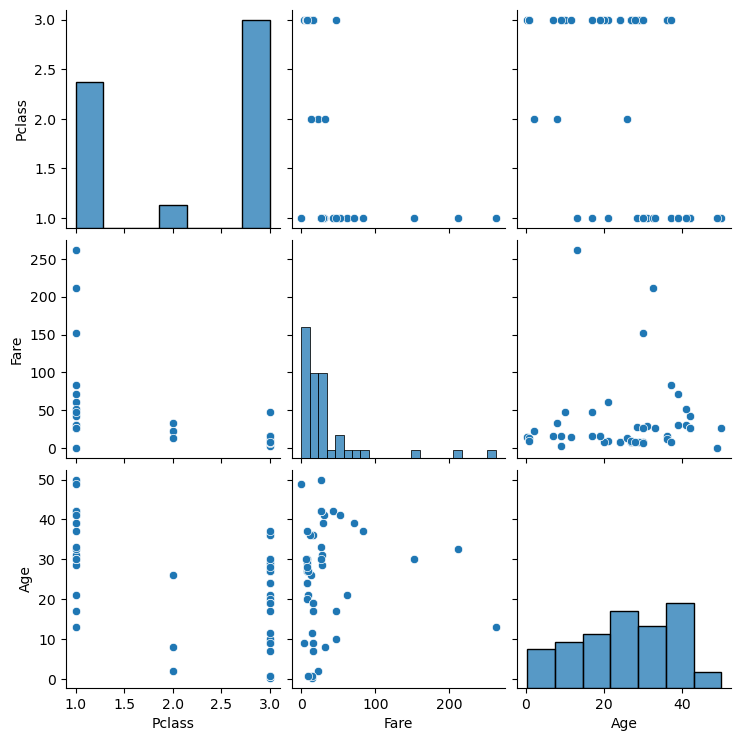

In [65]:
sns.pairplot(df_vis[['Sex', 'Pclass', 'Fare', 'Age']])

<AxesSubplot: xlabel='Sex', ylabel='Age'>

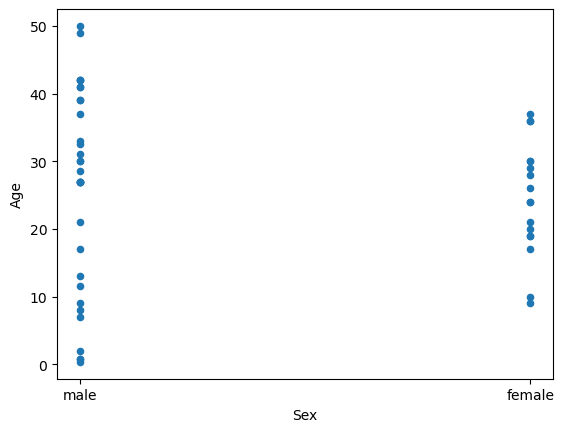

In [56]:
df_vis.plot.scatter('Sex','Age')

<AxesSubplot: xlabel='Sex', ylabel='Fare'>

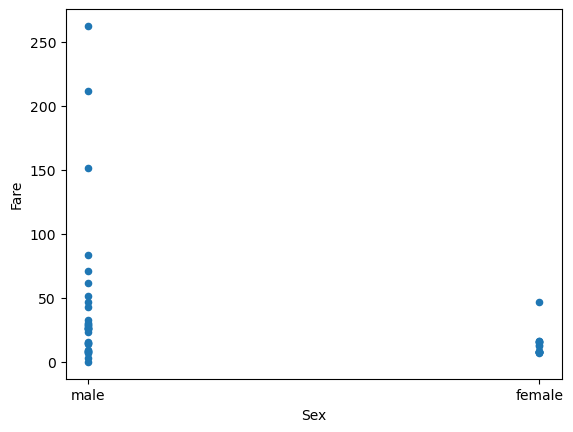

In [57]:
df_vis.plot.scatter('Sex','Fare')

<AxesSubplot: xlabel='Sex', ylabel='Pclass'>

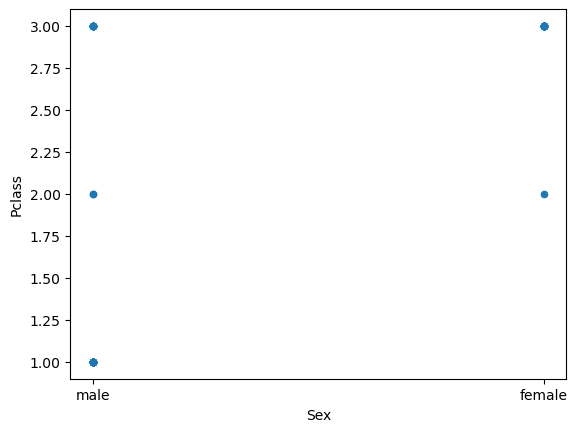

In [64]:
df_vis.plot.scatter('Sex','Pclass')